<a href="https://colab.research.google.com/github/bujang-Lee/jangyu/blob/main/Cosine_Similarity_ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 코사인 유사도(Cosine Similarity)를 이용한 영화 추천 프로그램

## '일상생활 속 기하' 보고서를 작성할 때 찾아본 코사인 유사도 이용해서 줄거리 기반 영화 추천 프로그램을 만들어보았다.

### 본격적으로 프로그램을 만들기 전  
### Numpy 라이브러리를 이용해 코사인 유사도를 계산하는 함수 제작

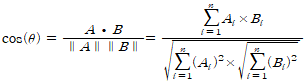

In [ ]:
# numpy 라이브러리 임포트
import numpy as np

# 코사인 값을 구하는 함수
def coSim(a, b):
  
  # 내적
  A_dot_B = 0
  for idx, val in enumerate(a):
    A_dot_B += val * b[idx]

  # 벡터 크기 구하기
  # 벡터 A 크기
  norm_A = 0
  for i in a:
    norm_A += i**2
  norm_A = norm_A**(1/2)

  # 벡터 B 크기
  norm_B = 0
  for i in b:
    norm_B += i**2
  norm_B = norm_B**(1/2)
    
  # 코사인 값 반환 (A•B/|A||B|)
  return A_dot_B/(norm_A*norm_B) 

In [ ]:
# 임의의 문서 배열(숫자는 단어의 빈도를 나타냄)
doc1 = np.array([1, 1, 1, 1])
doc2 = np.array([1, 0, 1, 1])
doc3 = np.array([2, 2, 2, 2])

# 함수 실행
print('문서 1, 2의 유사도: ', coSim(doc1, doc2))
print('문서 1, 3의 유사도: ', coSim(doc1, doc3))
print('문서 2, 3의 유사도: ', coSim(doc2, doc3))

여기서 문서 1, 2의 유사도, 문서 2, 3의 유사도가 같다.  
배열에 들어있는 숫자는 문서에서 단어 빈도인데, 코사인 유사도는 벡터의 크기가 아니라 벡터의 방향에 초점을 두기 때문에 유사도가 같게 나타난다.

## 프로그램 제작

### 캐글 영화 데이터 샘플 확인
데이터 다운로드 링크: https://www.kaggle.com/rounakbanik/the-movies-dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/movies_metadata.csv', low_memory=False)

In [3]:
# 데이터 확인을 위해 상위 2개 샘플 출력
data.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [4]:
# 상위 3만 개의 샘플을 data에 저장
data = data.head(30000)

### 영화 데이터 중 줄거리가 없는 데이터 삭제

In [5]:
print('overview 열의 결측값', data['overview'].isnull().sum(), '개 삭제')
data['overview'] = data['overview'].fillna('')

overview 열의 결측값 327 개 삭제


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


###유사도 계산을 위해 영화 줄거리 데이터를 TF-IDF 행렬로 표현(벡터를 성분으로 표시)

In [6]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['overview'])
print('TF-IDF 행렬의 크기(shape):', tfidf_matrix.shape)

TF-IDF 행렬의 크기(shape): (30000, 58562)


### 줄거리 데이터 간 코사인 유사도 연산(외장함수 사용)

In [7]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print('코사인 유사도 연산 결과:', cosine_sim.shape)

코사인 유사도 연산 결과: (30000, 30000)


In [8]:
cosine_sim[:10]

array([[1.        , 0.01561351, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01561351, 1.        , 0.0486754 , ..., 0.        , 0.        ,
        0.02282596],
       [0.        , 0.0486754 , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.00645049, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.10472251, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### 줄거리 데이터 간 코사인 유사도 연산(직접 만든 함수 사용)

In [ ]:
def coSim(a, b):
  
  # 내적
  A_dot_B = 0
  for idx, val in enumerate(a):
    if(val != 0 and b[idx] != 0):
      A_dot_B += val * b[idx]

  # 벡터 크기 구하기
  norm_A = 0
  for i in a:
    if(i!=0):
      norm_A += i**2
  norm_A = norm_A**(1/2)

  norm_B = 0
  for i in b:
    if(i!=0):
      norm_B += i**2
  norm_B = norm_B**(1/2)
    
  return A_dot_B/(norm_A*norm_B)

a = []
b = []
for i in tfidf_matrix:
  for j in tfidf_matrix:
    a.append(coSim(i, j))
  b.append(a)
  a = []

  print(b)

속도 향상을 위해서 함수 사용하지 않고 단순화한 코드

In [ ]:
a = []
b = []
for i in tfidf_matrix:
  for j in tfidf_matrix:
    A_dot_B = sum(i*j)   
    norm_A = (sum(i*i))**(1/2)
    norm_B = (sum(j*j))**(1/2)
    a.append(A_dot_B/(norm_A*norm_B))
  b.append(a)
  a = []

print(b)

###영화 데이터에서 제목을 key, 인덱스를 value로 하는 딕셔너리 제작

In [9]:
title_to_index = dict(zip(data['title'], data.index))

###줄거리가 가장 유사한 영화 10개를 찾는 함수

In [13]:
def get_recommendations(title, cosine_sim=cosine_sim):
  # 선택한 영화의 타이틀로부터 해당 영화의 인덱스를 가져옴
  idx = title_to_index[title]
  
  # 해당 영화와 다른 모든 영화의 유사도 가져옴
  sim_scores = list(enumerate(cosine_sim[idx]))

  # 유사도에 따라 영화 정렬
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

  # 유사도가 높은 상위 10개 영화 정렬
  sim_scores = sim_scores[1:11]

  # 가장 유사한 10개의 영화 인덱스 얻음
  movie_index = [idx[0] for idx in sim_scores]

  # 가장 유사한 10개의 영화 제목 출력
  return data['title'].iloc[movie_index]

###함수 실행

In [14]:
get_recommendations('The Dark Knight Rises')

12481                                      The Dark Knight
150                                         Batman Forever
1328                                        Batman Returns
15511                           Batman: Under the Red Hood
585                                                 Batman
21194    Batman Unmasked: The Psychology of the Dark Kn...
9230                    Batman Beyond: Return of the Joker
18035                                     Batman: Year One
19792              Batman: The Dark Knight Returns, Part 1
3095                          Batman: Mask of the Phantasm
Name: title, dtype: object

다크나이트 라이즈의 줄거리와 코사인 유사도를 구했을 때
가장 유사도가 높은 영화 10개를 추천했는데, 모두 배트맨 영화를 찾아낸 것을 알 수 있다.

기하 수업을 듣고 공부를 하면서 벡터의 내적이 어떻게 활용되는지 궁금했다.

컴퓨터를 이용해서 영화 추천 등에도 사용할 수 있다는 것을 알고, 직접 만들어보니 벡터라는 체계에 더욱 친숙해졌다. 다른 기하 개념들도 프로그래밍에 활용되는 것들이 있는지 알아보고 싶어졌다.